# Корреляция и регрессия

Булыгин Олег:  
* [LinkedIn](linkedin.com/in/obulygin)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)
* [PythonTalk на Кью](https://yandex.ru/q/loves/pythontalk/)

In [9]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# нужный датасет встроен в библиотеку sklearn
data = load_boston()

In [11]:
data['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
data['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [13]:
# добавляем target в сами данные
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Содержит информацию о жилье в Бостоне, собранную бюро переписи населения США. Она была получена из архива StatLib и широко использовалась в литературе для оценки алгоритмов.

- CRIM - уровень преступности на душу населения
- ZN - доля земли под жилую застройку,
- INDUS - доля акров, не относящихся к розничной торговле.
- CHAS - фиктивная переменная реки Чарльз (1, если участок ограничивает реку; 0 в противном случае)
- NOX - концентрация оксидов азота 
- RM - среднее количество комнат в доме
- AGE - доля занимаемых владельцами единиц, построенных до 1940 г.
- DIS - взвешенное расстояние до пяти бостонских центров занятости
- RAD - индекс доступности радиальных автомобильных дорог
- TAX - полная ставка налога на имущество за 10 000 долларов США.
- PTRATIO - соотношение учеников и учителей по городам
- B - 1000 (Bk - 0,63) ^ 2, где Bk - доля афроамериканцев по городам
- LSTAT - % более населения низкого соц статуса
- MEDV - Средняя стоимость домов в 1000 долларов

## Корреляция

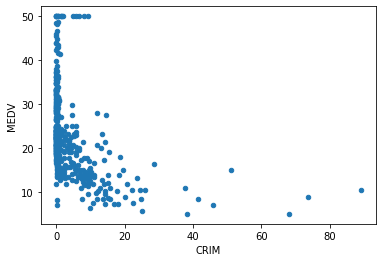

In [14]:
# визуализируем взаимосвязь преступности и цены дома
df.plot(kind='scatter', x='CRIM', y='MEDV')

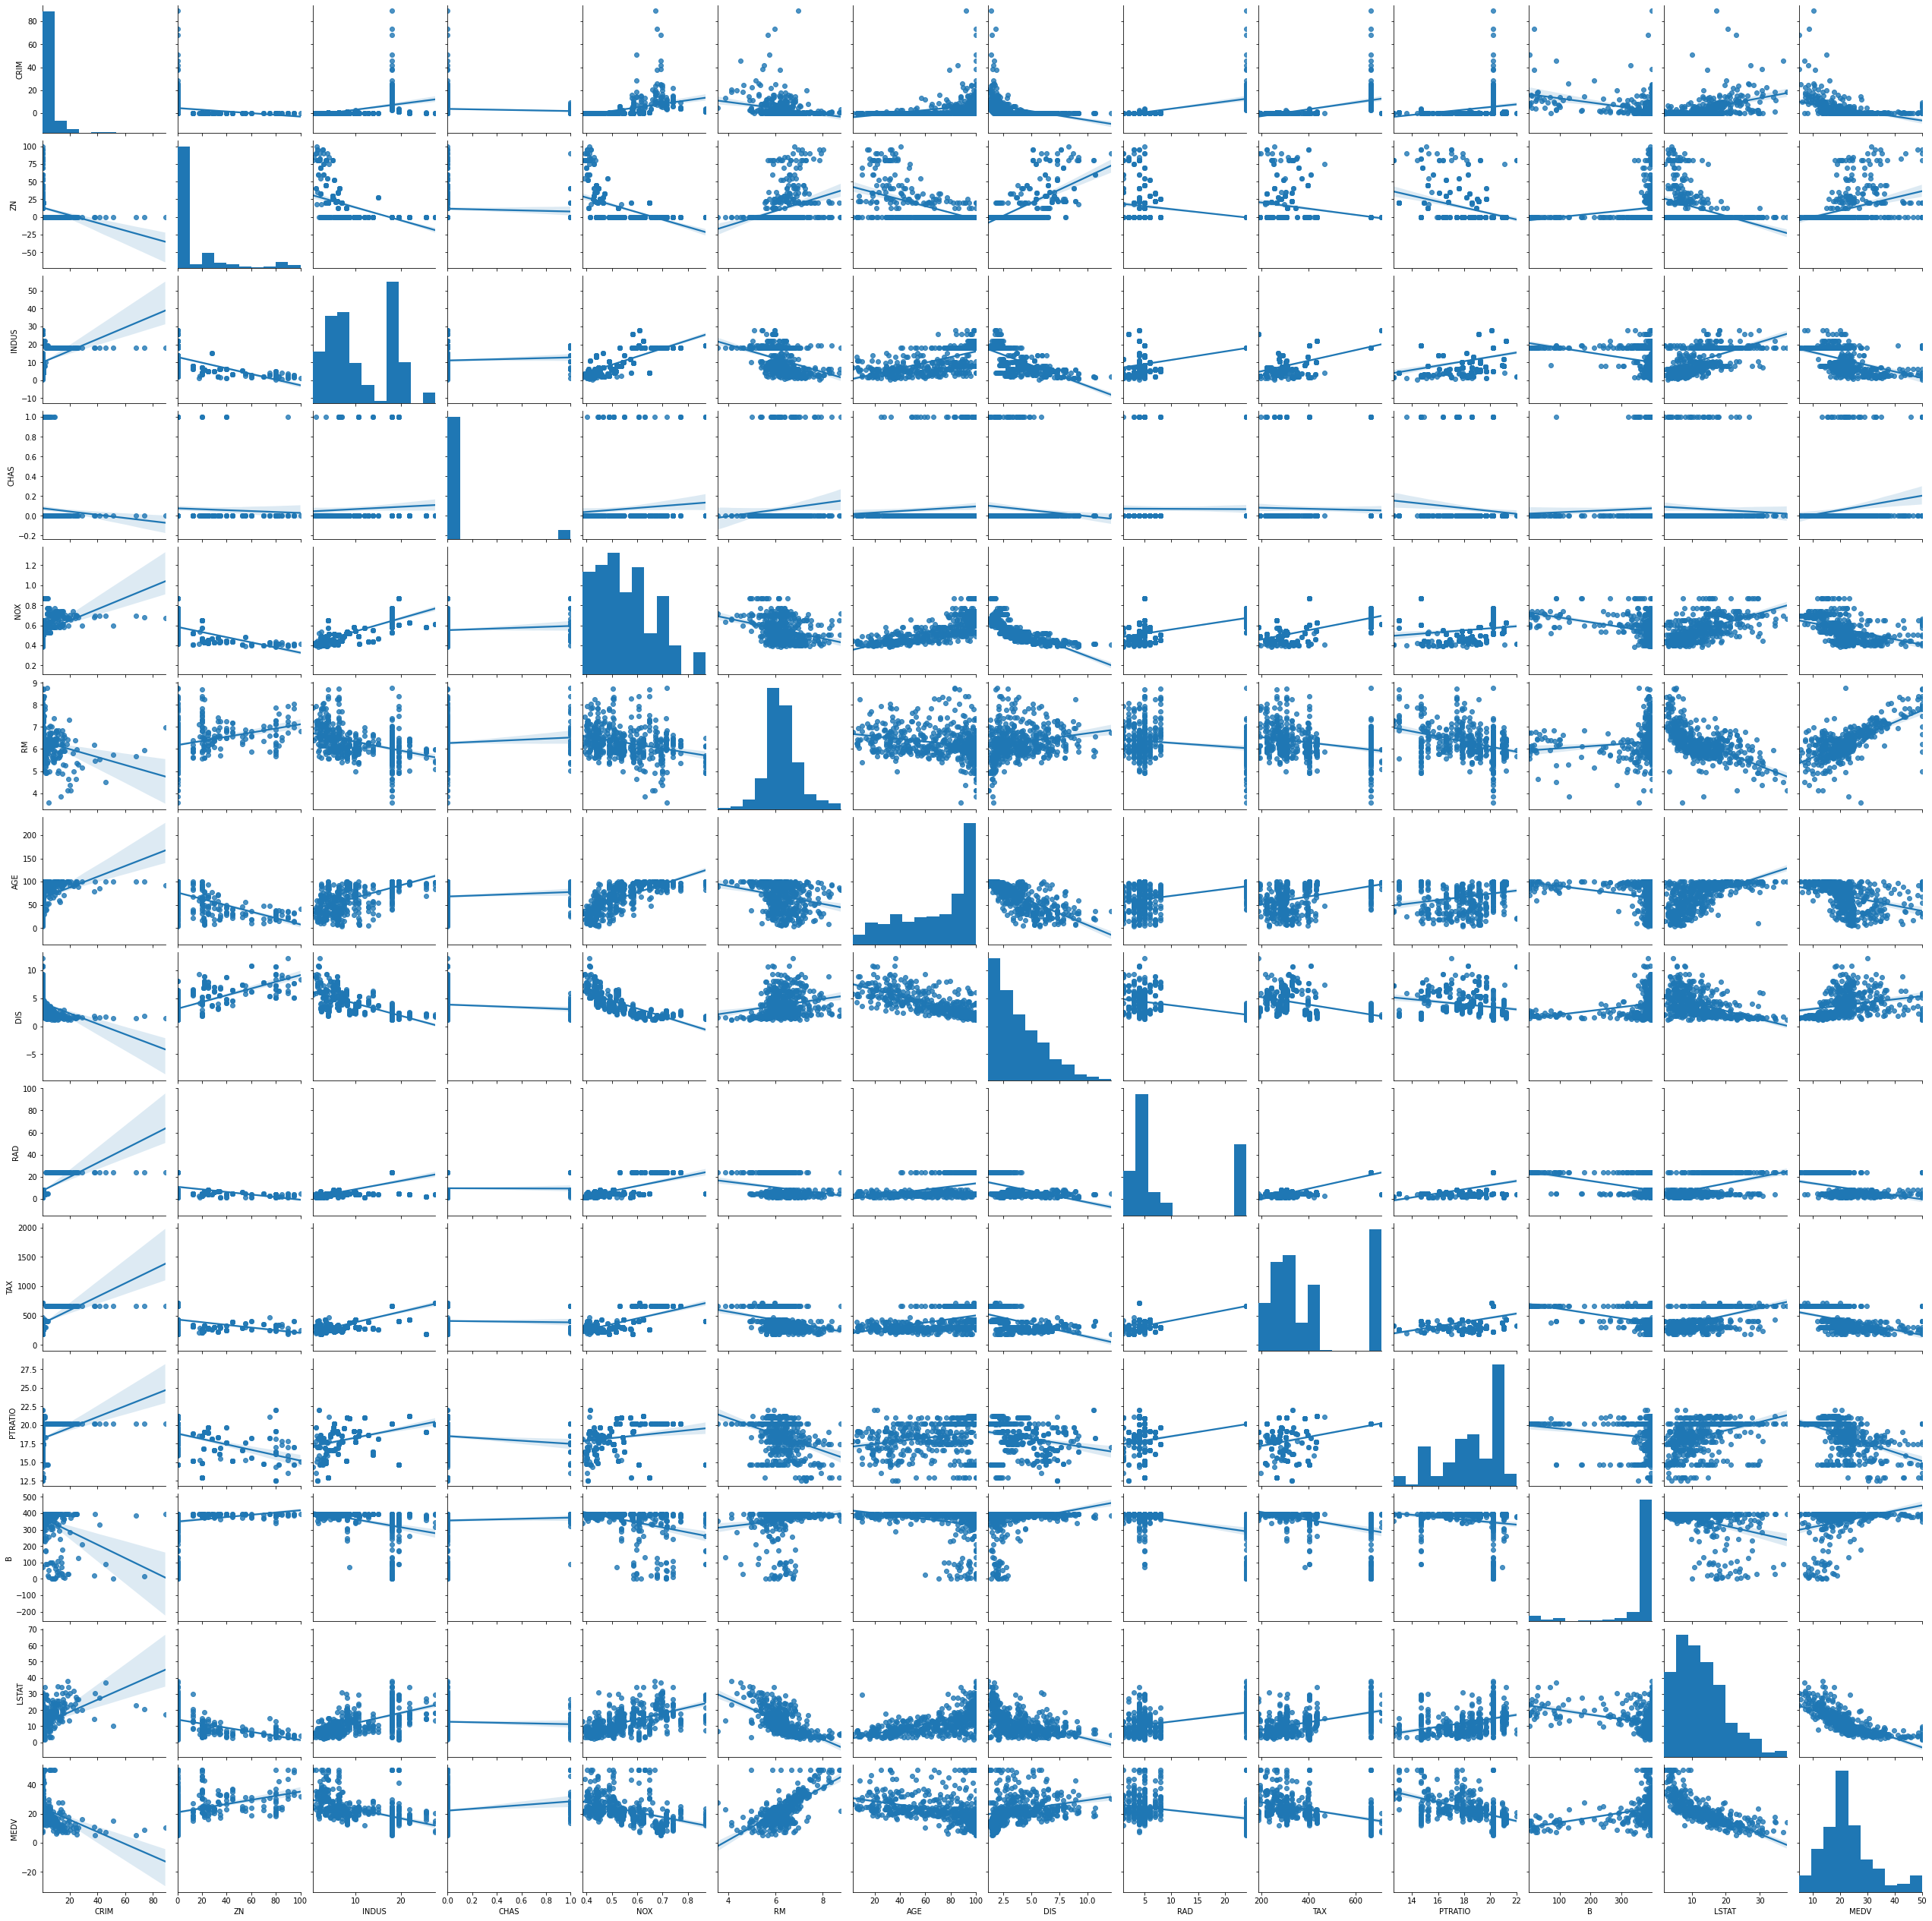

In [15]:
# можем использовать pairplot для изучения взаимосвязи между множеством признаков
sns.pairplot(df, kind='reg')

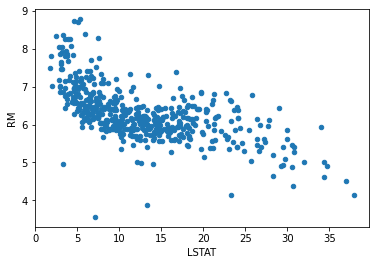

In [16]:
# изучаем взаимосвязь между населением низкого соц. статуса и количеством комнат в доме
df.plot(kind='scatter', x='LSTAT', y='RM')

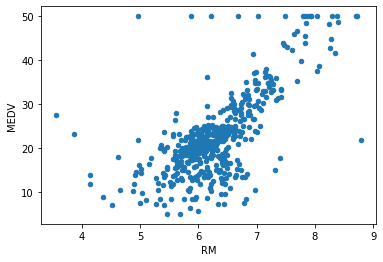

In [17]:
# изучаем взаимосвязь между ценой и количеством комнат в доме
df.plot(kind='scatter', x='RM', y='MEDV')

In [18]:
# считаем коэф. корреляции Пирсона
df[['RM', 'MEDV']].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [19]:
# считаем коэф. корреляции Спирмана
df[['RM', 'MEDV']].corr(method='spearman')

,RM,MEDV
RM,1.000000,0.633576
MEDV,0.633576,1.000000


In [20]:
# считаем коэф. корреляции Кенделла
df[['RM', 'MEDV']].corr(method='kendall')

,RM,MEDV
RM,1.000000,0.482829
MEDV,0.482829,1.000000


In [21]:
# можем посчитать коэффициенты корреляции между всеми показателями
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


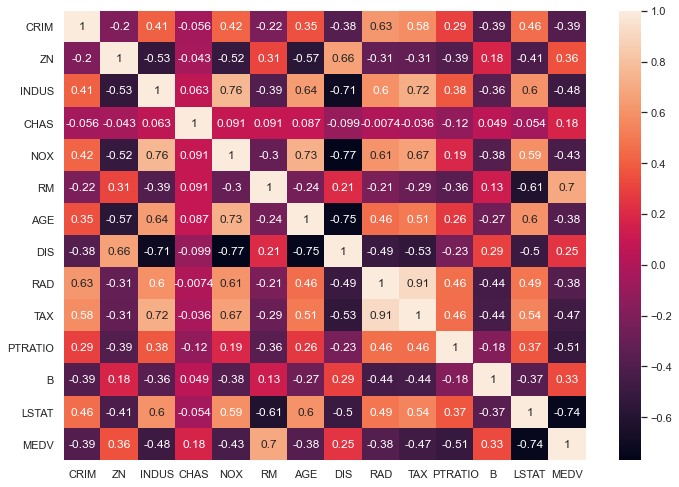

In [22]:
# удобно визуализировать при помощи тепловой карты
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot=True)

## Регрессия

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
X = df[['CRIM', 'NOX', 'LSTAT', 'AGE']]
y = df['MEDV']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
X_train.shape

(354, 4)

In [27]:
X_test.shape

(152, 4)

In [28]:
y_train.shape

(354,)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [30]:
model.coef_

array([-0.11728121,  0.41326712, -1.00749254,  0.03431302])

In [31]:
model.intercept_

33.345944504779496

In [32]:
# y = -0.429 * x + 24.5

In [33]:
y_pred = model.predict(X_test)
y_pred

array([27.32393898, 31.09650521, 18.76995895, 28.21215892, 18.79416168,
       24.01126889, 17.92093967, 12.44038494, 23.23793484, 21.85876973,
       18.72455444, 19.26191989, -5.55859126, 22.93007173, 24.2378816 ,
       23.62689473, 19.14997005,  4.53603827, 31.62448733, 17.66733228,
       27.43861438, 27.37889477, 13.89518317, 26.20397799, 20.27145031,
       17.64004709, 25.60438026, 16.90350365, 19.28840414, 21.77308418,
       21.777029  , 28.07065346, 21.14201267, 26.26733753, 14.83148154,
       20.92536691, 31.57289668, 25.27002374, 20.79015594, 26.10995525,
       14.75676796, 28.36100867, 31.70855555, 21.57371625, 26.93461994,
       18.90886763, 18.20545581, 26.96238867, 19.54584823, 30.78743696,
       23.02384272, 30.17668879, 17.70998016, 28.26648627, 32.14137096,
       24.27760141, 19.70420413, 31.11407317, 25.48051487, 17.3120849 ,
       25.43632434, 29.4163696 , 30.4485453 , 22.95240815, 29.20717677,
       13.66523071, 18.75188167, 27.85223433, 29.9152384 , 16.95

In [34]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: MEDV, Length: 152, dtype: float64

In [35]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.49102076636507175

ValueError: x and y must be the same size

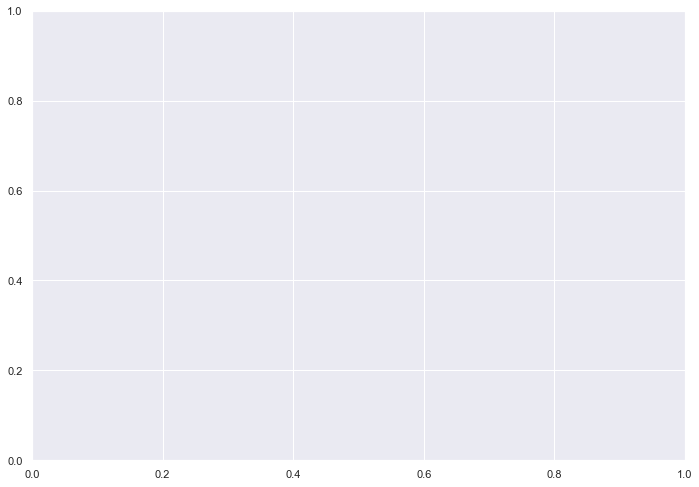

In [47]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
# Альтернативный способ из statsmodel

In [38]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

In [41]:
X_const

,const,CRIM,NOX,LSTAT,AGE
5,1.0,0.02985,0.458,5.21,58.7
116,1.0,0.13158,0.547,12.04,72.5
45,1.0,0.17142,0.448,10.21,33.8
16,1.0,1.05393,0.538,6.58,29.3
468,1.0,15.57570,0.580,18.13,71.0
...,...,...,...,...,...
106,1.0,0.17120,0.520,18.66,91.9
270,1.0,0.29916,0.464,13.00,42.1
348,1.0,0.01501,0.435,5.99,29.7
435,1.0,11.16040,0.740,23.27,94.6


In [42]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     116.7
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           4.50e-63
Time:                        21:26:19   Log-Likelihood:                -1144.3
No. Observations:                 354   AIC:                             2299.
Df Residuals:                     349   BIC:                             2318.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.3459      1.762     18.923      0.0

In [43]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const    33.345945
CRIM     -0.117281
NOX       0.413267
LSTAT    -1.007493
AGE       0.034313
dtype: float64
R2:  0.5722088213066672


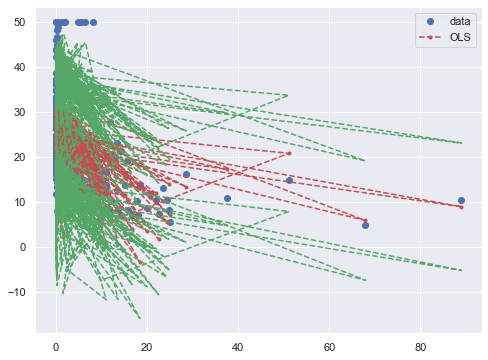

In [44]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

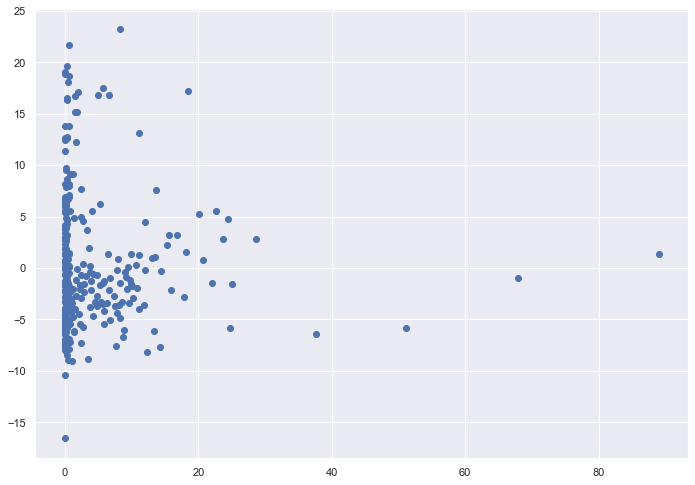

In [45]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([ 1.,  0.,  0.,  4., 22., 46., 61., 67., 52., 25., 18., 21.,  9.,
         2.,  7.,  4.,  7.,  5.,  1.,  2.]),
 array([-16.51063696, -14.52412144, -12.53760592, -10.55109041,
         -8.56457489,  -6.57805937,  -4.59154386,  -2.60502834,
         -0.61851282,   1.3680027 ,   3.35451821,   5.34103373,
          7.32754925,   9.31406476,  11.30058028,  13.2870958 ,
         15.27361132,  17.26012683,  19.24664235,  21.23315787,
         23.21967338]),
 <a list of 20 Patch objects>)

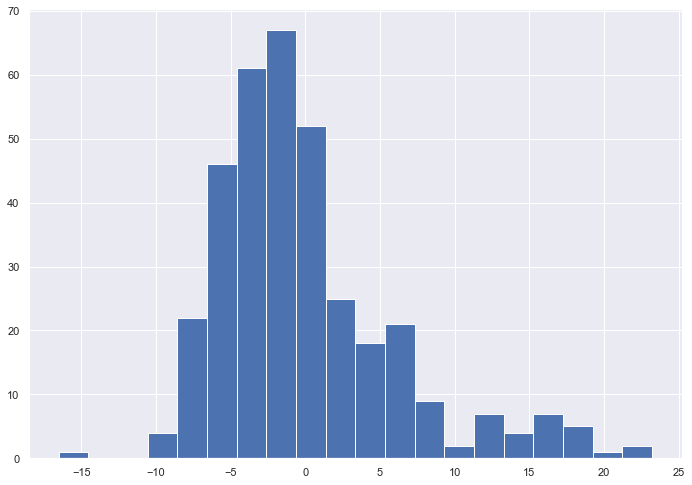

In [46]:
plt.hist(results.resid, bins=20)